<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/fluidflow/multiphaseflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#@title Muti phase flow
#@markdown This section gives and introduction to multi phase flow.
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#Litterature
http://www.drbratland.com/PipeFlow2/chapter1.html

http://www.thermalfluidscentral.org/e-books/pdf/edb3/13.pdf

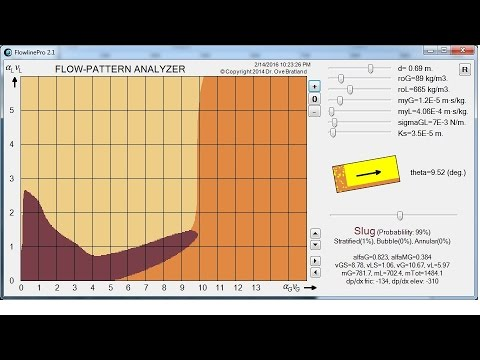

In [6]:
#@title Introduction to flow patterns in multi phase flow
#@markdown This video gives introduction to flow patterns in multi phase flow
from IPython.display import YouTubeVideo
YouTubeVideo('7Tsomarcq30', width=600, height=400)

#Mutli phase flow with neqsim

In [7]:
from neqsim import methods
from neqsim.thermo import fluid, TPflash
from neqsim.process import pipe, pipeline, clearProcess, stream, runProcess

# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-Eos
fluid1.addComponent("methane", 85.0)
fluid1.addComponent("ethane", 5.0)
fluid1.setMixingRule(2)
fluid1.setTemperature(88.15, "C")
fluid1.setPressure(150.0, "bara")
fluid1.setTotalFlowRate(50.0, "MSm3/day")

TPflash(fluid1)
fluid1.initPhysicalProperties()

diameter = [1.0, 1.0, 1.0]
roughnes = [15.0e-6, 15.0e-6, 15.0e-6]
position = [0.0, 1000.0, 5000.0]
height = [0.0, 0.0, 0.0]
outtemperatures =[278.15, 278.15, 278.15]
outHeatU = [15.0, 15.0, 15.0]
wallHeatU = [15.0, 15.0, 15.0]
clearProcess()
stream1 = stream(fluid1)

deltaElevation = 0.0
pipeLength = 500000.0
#roughness= 15.0e-6
#diameter = 1.1
pipe1 = pipeline(stream1, position, diameter, height, outtemperatures, roughnes,outHeatU,wallHeatU)
#pipeSimple = pipe(stream1, pipeLength, deltaElevation, diameter, roughness)
runProcess()